## Setup

In [1]:
# Set working directory
import os
os.chdir("..")

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from Code.training import compute_embedding
import Data.datasets as datasets
import Code.visualization as viz

%matplotlib inline

import wandb
wandb.init(mode="disabled")

sns.set_theme(context="paper", style="ticks",
              rc={"axes.spines.right": False,
                  "axes.spines.top": False,
                  "axes.spines.bottom": False,
                  "axes.spines.left": False,},
              font_scale=3,
              )

output_path = "Output/LossFunctions/"
if not os.path.exists(output_path):
    os.mkdir(output_path)

In [2]:
def plot_embedding(Y, colors=None, title=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(6,6))
    else:
        fig = plt.gcf()

    if colors is not None:
        g = sns.scatterplot(x=Y[:, 0],
                            y=Y[:, 1],
                            s=200, ax=ax,
                            hue=colors,
                            palette="husl",
                            alpha=0.7,
                            linewidth=0,
                            clip_on=False)
        ax.get_legend().remove()
    else:
        g = sns.scatterplot(x=Y[:, 0],
                            y=Y[:, 1],
                            s=200,
                            ax=ax,
                            alpha=0.7,
                            linewidth=0,
                            clip_on=False)
    ax.set_aspect('equal')
    ax.set_title(title)
    sns.despine(left=True, offset=5, trim=True, ax=ax)
    ax.set_yticks([])
    plt.tight_layout()
    return fig

def plot_MST_distances(Y):
    import networkx as nx
    import scipy
    G = nx.Graph(scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(Y)))
    T = nx.minimum_spanning_tree(G, algorithm="prim")
    T.nodes
    T.edges
    p = plot_embedding(Y)
    ax = p.get_axes()[0]

    for edge in T.edges:
        start = Y[edge[0]]
        end = Y[edge[1]]
        sns.lineplot(x=[start[0], end[0]], y=[start[1], end[1]], color='gray', ax=ax, lw=1)
        ax.annotate(f"{G[edge[0]][edge[1]]['weight']:.1f}",
                    xy=(0.5*start[0] + 0.5*end[0], 0.5*start[1]+0.5*end[1]),
                    horizontalalignment='center', verticalalignment='center')
    plt.show()
    return G

## Parameter Setup

In [3]:
# Method
method_name = "TOPO"
training_config = {
    "num_epochs": 500,
    "learning_rate": 0.01,
}
random_state = 42
topo_weight = 1

# Data Configuration
dataset_name = "random"
dataset_config = {"n": 20, 
                  "ndim": 2,
                  "variance": 0.0675,
                  "seed": 40,
                  "noise": "normal"}

dataset_generator = datasets.str_to_data(dataset_name)
data, labels = dataset_generator(**dataset_config)

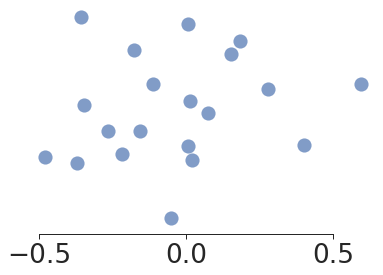

In [4]:
p = plot_embedding(data)
plt.savefig(os.path.join(output_path, "random_dataset.png"), bbox_inches='tight', dpi=200)

## 0-dim topological structures (D0)

Initial loss total_loss: -0.2835, emb_loss: 0.0000, topo_loss: -0.2835, weighted_total_loss: -0.2835, 
Epoch   50: total_loss: -1.0957, emb_loss: 0.0000, topo_loss: -1.0957, weighted_total_loss: -1.0957, 
Epoch  100: total_loss: -1.7931, emb_loss: 0.0000, topo_loss: -1.7931, weighted_total_loss: -1.7931, 
Epoch  150: total_loss: -2.4559, emb_loss: 0.0000, topo_loss: -2.4559, weighted_total_loss: -2.4559, 
Epoch  200: total_loss: -3.1120, emb_loss: 0.0000, topo_loss: -3.1120, weighted_total_loss: -3.1120, 
Epoch  250: total_loss: -3.7587, emb_loss: 0.0000, topo_loss: -3.7587, weighted_total_loss: -3.7587, 
Epoch  300: total_loss: -4.3965, emb_loss: 0.0000, topo_loss: -4.3965, weighted_total_loss: -4.3965, 
Epoch  350: total_loss: -5.0322, emb_loss: 0.0000, topo_loss: -5.0322, weighted_total_loss: -5.0322, 
Epoch  400: total_loss: -5.6711, emb_loss: 0.0000, topo_loss: -5.6711, weighted_total_loss: -5.6711, 
Epoch  450: total_loss: -6.3035, emb_loss: 0.0000, topo_loss: -6.3035, weighted_t

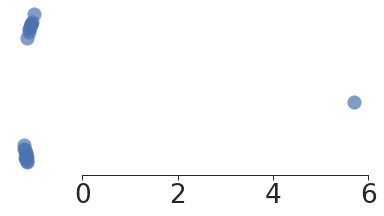

In [5]:
loss_config = {"custom": {"sampling": False,
                          "weight": -1,
                          "dim": 0,
                          "i": 2,
                          "j": 2}} # two clusters
Y, result_df = compute_embedding(data=data,
                                 method_name=method_name,
                                 method_config={},
                                 loss_config=loss_config,
                                 training_config=training_config,
                                 topo_weight=topo_weight,
                                 random_state=random_state)
p = plot_embedding(Y)
plt.savefig(os.path.join(output_path, "random_D0_d2_maximize.png"), bbox_inches='tight', dpi=200)

Initial loss total_loss: 0.2835, emb_loss: 0.0000, topo_loss: 0.2835, weighted_total_loss: 0.2835, 
Epoch   50: total_loss: 0.1351, emb_loss: 0.0000, topo_loss: 0.1351, weighted_total_loss: 0.1351, 
Epoch  100: total_loss: 0.0935, emb_loss: 0.0000, topo_loss: 0.0935, weighted_total_loss: 0.0935, 
Epoch  150: total_loss: 0.0757, emb_loss: 0.0000, topo_loss: 0.0757, weighted_total_loss: 0.0757, 
Epoch  200: total_loss: 0.0583, emb_loss: 0.0000, topo_loss: 0.0583, weighted_total_loss: 0.0583, 
Epoch  250: total_loss: 0.0516, emb_loss: 0.0000, topo_loss: 0.0516, weighted_total_loss: 0.0516, 
Epoch  300: total_loss: 0.0428, emb_loss: 0.0000, topo_loss: 0.0428, weighted_total_loss: 0.0428, 
Epoch  350: total_loss: 0.0394, emb_loss: 0.0000, topo_loss: 0.0394, weighted_total_loss: 0.0394, 
Epoch  400: total_loss: 0.0415, emb_loss: 0.0000, topo_loss: 0.0415, weighted_total_loss: 0.0415, 
Epoch  450: total_loss: 0.0319, emb_loss: 0.0000, topo_loss: 0.0319, weighted_total_loss: 0.0319, 
Epoch  50

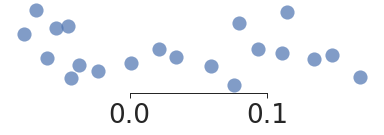

In [6]:
loss_config = {"custom": {"sampling": False,
                          "weight": 1,
                          "dim": 0,
                          "i": 2,
                          "j": 2}} # two clusters
Y, result_df = compute_embedding(data=data,
                                 method_name=method_name,
                                 method_config={},
                                 loss_config=loss_config,
                                 training_config=training_config,
                                 topo_weight=topo_weight,
                                 random_state=random_state)
#p = viz.plot_paper(Y, colors=labels)
p = plot_embedding(Y, colors=labels)

plt.savefig(os.path.join(output_path, "random_D0_d2_minimize.png"), bbox_inches='tight', dpi=200)

Initial loss total_loss: 0.2263, emb_loss: 0.0000, topo_loss: 0.2263, weighted_total_loss: 0.2263, 
Epoch   50: total_loss: 0.1144, emb_loss: 0.0000, topo_loss: 0.1144, weighted_total_loss: 0.1144, 
Epoch  100: total_loss: 0.0830, emb_loss: 0.0000, topo_loss: 0.0830, weighted_total_loss: 0.0830, 
Epoch  150: total_loss: 0.0650, emb_loss: 0.0000, topo_loss: 0.0650, weighted_total_loss: 0.0650, 
Epoch  200: total_loss: 0.0544, emb_loss: 0.0000, topo_loss: 0.0544, weighted_total_loss: 0.0544, 
Epoch  250: total_loss: 0.0343, emb_loss: 0.0000, topo_loss: 0.0343, weighted_total_loss: 0.0343, 
Epoch  300: total_loss: 0.0329, emb_loss: 0.0000, topo_loss: 0.0329, weighted_total_loss: 0.0329, 
Epoch  350: total_loss: 0.0292, emb_loss: 0.0000, topo_loss: 0.0292, weighted_total_loss: 0.0292, 
Epoch  400: total_loss: 0.0378, emb_loss: 0.0000, topo_loss: 0.0378, weighted_total_loss: 0.0378, 
Epoch  450: total_loss: 0.0216, emb_loss: 0.0000, topo_loss: 0.0216, weighted_total_loss: 0.0216, 
Epoch  50

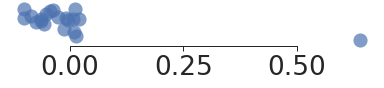

In [7]:
loss_config = {"custom": {"sampling": False,
                          "weight": 1,
                          "dim": 0,
                          "i": 3,
                          "j": 3}}
Y, result_df = compute_embedding(data=data,
                                 method_name=method_name,
                                 method_config={},
                                 loss_config=loss_config,
                                 training_config=training_config,
                                 topo_weight=topo_weight,
                                 random_state=random_state)
p = plot_embedding(Y)
plt.savefig(os.path.join(output_path, "random_D0_d3_minimize.png"), bbox_inches='tight', dpi=200)

Initial loss total_loss: -0.2263, emb_loss: 0.0000, topo_loss: -0.2263, weighted_total_loss: -0.2263, 
Epoch   50: total_loss: -0.8478, emb_loss: 0.0000, topo_loss: -0.8478, weighted_total_loss: -0.8478, 
Epoch  100: total_loss: -1.4228, emb_loss: 0.0000, topo_loss: -1.4228, weighted_total_loss: -1.4228, 
Epoch  150: total_loss: -1.9761, emb_loss: 0.0000, topo_loss: -1.9761, weighted_total_loss: -1.9761, 
Epoch  200: total_loss: -2.5271, emb_loss: 0.0000, topo_loss: -2.5271, weighted_total_loss: -2.5271, 
Epoch  250: total_loss: -3.0715, emb_loss: 0.0000, topo_loss: -3.0715, weighted_total_loss: -3.0715, 
Epoch  300: total_loss: -3.6187, emb_loss: 0.0000, topo_loss: -3.6187, weighted_total_loss: -3.6187, 
Epoch  350: total_loss: -4.1565, emb_loss: 0.0000, topo_loss: -4.1565, weighted_total_loss: -4.1565, 
Epoch  400: total_loss: -4.6984, emb_loss: 0.0000, topo_loss: -4.6984, weighted_total_loss: -4.6984, 
Epoch  450: total_loss: -5.2463, emb_loss: 0.0000, topo_loss: -5.2463, weighted_t

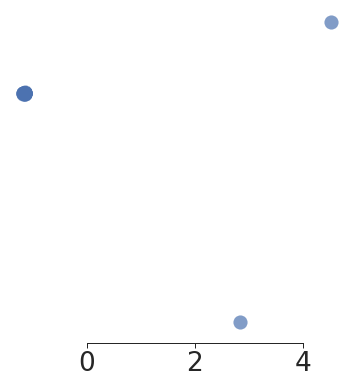

In [8]:
loss_config = {"custom": {"sampling": False,
                          "weight": -1,
                          "dim": 0,
                          "i": 3,
                          "j": 3}}
Y, result_df = compute_embedding(data=data,
                                 method_name=method_name,
                                 method_config={},
                                 loss_config=loss_config,
                                 training_config=training_config,
                                 topo_weight=topo_weight,
                                 random_state=random_state)
p = plot_embedding(Y)
plt.savefig(os.path.join(output_path, "random_D0_d3_maximize.png"), bbox_inches='tight', dpi=200)

Initial loss total_loss: 0.0497, emb_loss: 0.0000, topo_loss: 0.0497, weighted_total_loss: 0.0497, 
Epoch   50: total_loss: 0.0022, emb_loss: 0.0000, topo_loss: 0.0022, weighted_total_loss: 0.0022, 
Epoch  100: total_loss: 0.0044, emb_loss: 0.0000, topo_loss: 0.0044, weighted_total_loss: 0.0044, 
Epoch  150: total_loss: 0.0014, emb_loss: 0.0000, topo_loss: 0.0014, weighted_total_loss: 0.0014, 
Epoch  200: total_loss: 0.0028, emb_loss: 0.0000, topo_loss: 0.0028, weighted_total_loss: 0.0028, 
Epoch  250: total_loss: 0.0042, emb_loss: 0.0000, topo_loss: 0.0042, weighted_total_loss: 0.0042, 
Epoch  300: total_loss: 0.0015, emb_loss: 0.0000, topo_loss: 0.0015, weighted_total_loss: 0.0015, 
Epoch  350: total_loss: 0.0021, emb_loss: 0.0000, topo_loss: 0.0021, weighted_total_loss: 0.0021, 
Epoch  400: total_loss: 0.0014, emb_loss: 0.0000, topo_loss: 0.0014, weighted_total_loss: 0.0014, 
Epoch  450: total_loss: 0.0014, emb_loss: 0.0000, topo_loss: 0.0014, weighted_total_loss: 0.0014, 
Epoch  50

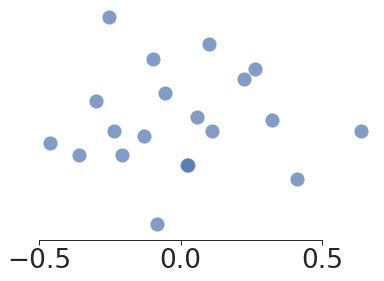

In [9]:
loss_config = {"custom": {"sampling": False,
                          "weight": 1,
                          "dim": 0,
                          "i": 20,
                          "j": 20}}
Y, result_df = compute_embedding(data=data,
                                 method_name=method_name,
                                 method_config={},
                                 loss_config=loss_config,
                                 training_config=training_config,
                                 topo_weight=topo_weight,
                                 random_state=random_state)
#p = viz.plot_paper(Y, colors=labels)
p = plot_embedding(Y, colors=labels)

plt.savefig(os.path.join(output_path, "random_D0_dn_minimize.png"), bbox_inches='tight', dpi=200)

Initial loss total_loss: -0.0497, emb_loss: 0.0000, topo_loss: -0.0497, weighted_total_loss: -0.0497, 
Epoch   50: total_loss: -0.1764, emb_loss: 0.0000, topo_loss: -0.1764, weighted_total_loss: -0.1764, 
Epoch  100: total_loss: -0.2183, emb_loss: 0.0000, topo_loss: -0.2183, weighted_total_loss: -0.2183, 
Epoch  150: total_loss: -0.2667, emb_loss: 0.0000, topo_loss: -0.2667, weighted_total_loss: -0.2667, 
Epoch  200: total_loss: -0.3208, emb_loss: 0.0000, topo_loss: -0.3208, weighted_total_loss: -0.3208, 
Epoch  250: total_loss: -0.3671, emb_loss: 0.0000, topo_loss: -0.3671, weighted_total_loss: -0.3671, 
Epoch  300: total_loss: -0.4134, emb_loss: 0.0000, topo_loss: -0.4134, weighted_total_loss: -0.4134, 
Epoch  350: total_loss: -0.4686, emb_loss: 0.0000, topo_loss: -0.4686, weighted_total_loss: -0.4686, 
Epoch  400: total_loss: -0.5176, emb_loss: 0.0000, topo_loss: -0.5176, weighted_total_loss: -0.5176, 
Epoch  450: total_loss: -0.5679, emb_loss: 0.0000, topo_loss: -0.5679, weighted_t

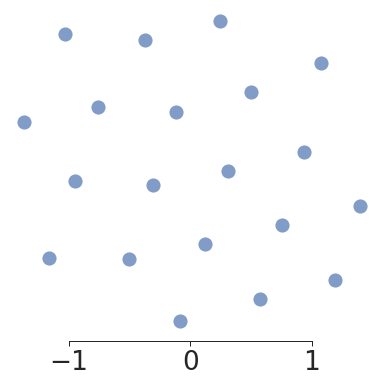

In [11]:
loss_config = {"custom": {"sampling": False,
                          "weight": -1,
                          "dim": 0,
                          "i": 20,
                          "j": 20}}
Y, result_df = compute_embedding(data=data,
                                 method_name=method_name,
                                 method_config={},
                                 loss_config=loss_config,
                                 training_config=training_config,
                                 topo_weight=topo_weight,
                                 random_state=random_state)
p = plot_embedding(Y)
plt.savefig(os.path.join(output_path, "random_D0_dn_maximize.png"), bbox_inches='tight', dpi=200)

Initial loss total_loss: 2.8167, emb_loss: 0.0000, topo_loss: 2.8167, weighted_total_loss: 2.8167, 
Epoch   50: total_loss: 0.4621, emb_loss: 0.0000, topo_loss: 0.4621, weighted_total_loss: 0.4621, 
Epoch  100: total_loss: 0.0840, emb_loss: 0.0000, topo_loss: 0.0840, weighted_total_loss: 0.0840, 
Epoch  150: total_loss: 0.0618, emb_loss: 0.0000, topo_loss: 0.0618, weighted_total_loss: 0.0618, 
Epoch  200: total_loss: 0.0739, emb_loss: 0.0000, topo_loss: 0.0739, weighted_total_loss: 0.0739, 
Epoch  250: total_loss: 0.0551, emb_loss: 0.0000, topo_loss: 0.0551, weighted_total_loss: 0.0551, 
Epoch  300: total_loss: 0.0542, emb_loss: 0.0000, topo_loss: 0.0542, weighted_total_loss: 0.0542, 
Epoch  350: total_loss: 0.0566, emb_loss: 0.0000, topo_loss: 0.0566, weighted_total_loss: 0.0566, 
Epoch  400: total_loss: 0.0545, emb_loss: 0.0000, topo_loss: 0.0545, weighted_total_loss: 0.0545, 
Epoch  450: total_loss: 0.0622, emb_loss: 0.0000, topo_loss: 0.0622, weighted_total_loss: 0.0622, 
Epoch  50

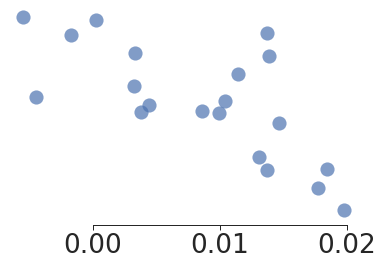

In [12]:
loss_config = {"custom": {"sampling": False,
                          "weight": 1,
                          "dim": 0,
                          "i": 2,
                          "j": np.inf}}
Y, result_df = compute_embedding(data=data,
                                 method_name=method_name,
                                 method_config={},
                                 loss_config=loss_config,
                                 training_config=training_config,
                                 topo_weight=topo_weight,
                                 random_state=random_state)
p = plot_embedding(Y)
plt.savefig(os.path.join(output_path, "random_D0_d2-dinf_minimize.png"), bbox_inches='tight', dpi=200)

Initial loss total_loss: -2.8167, emb_loss: 0.0000, topo_loss: -2.8167, weighted_total_loss: -2.8167, 
Epoch   50: total_loss: -7.6823, emb_loss: 0.0000, topo_loss: -7.6823, weighted_total_loss: -7.6823, 
Epoch  100: total_loss: -12.0513, emb_loss: 0.0000, topo_loss: -12.0513, weighted_total_loss: -12.0513, 
Epoch  150: total_loss: -16.3697, emb_loss: 0.0000, topo_loss: -16.3697, weighted_total_loss: -16.3697, 
Epoch  200: total_loss: -20.6308, emb_loss: 0.0000, topo_loss: -20.6308, weighted_total_loss: -20.6308, 
Epoch  250: total_loss: -24.8746, emb_loss: 0.0000, topo_loss: -24.8746, weighted_total_loss: -24.8746, 
Epoch  300: total_loss: -29.0739, emb_loss: 0.0000, topo_loss: -29.0739, weighted_total_loss: -29.0739, 
Epoch  350: total_loss: -33.3010, emb_loss: 0.0000, topo_loss: -33.3010, weighted_total_loss: -33.3010, 
Epoch  400: total_loss: -37.5105, emb_loss: 0.0000, topo_loss: -37.5105, weighted_total_loss: -37.5105, 
Epoch  450: total_loss: -41.6518, emb_loss: 0.0000, topo_los

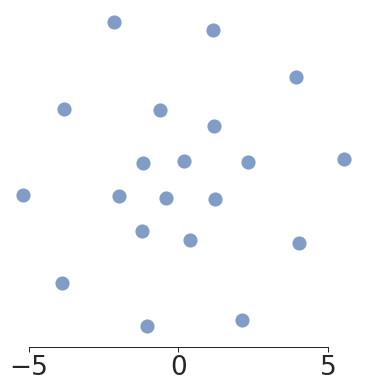

In [13]:
loss_config = {"custom": {"sampling": False,
                          "weight": -1,
                          "dim": 0,
                          "i": 2,
                          "j": np.inf}}
Y, result_df = compute_embedding(data=data,
                                 method_name=method_name,
                                 method_config={},
                                 loss_config=loss_config,
                                 training_config=training_config,
                                 topo_weight=topo_weight,
                                 random_state=random_state)
p = plot_embedding(Y)
plt.savefig(os.path.join(output_path, "random_D0_d2-dinf_maximize.png"), bbox_inches='tight', dpi=200)
#plot_MST_distances(Y)

## 1-dim topological structures (D1)

Initial loss total_loss: -0.0496, emb_loss: 0.0000, topo_loss: -0.0496, weighted_total_loss: -0.0496, 
Epoch   50: total_loss: -0.4522, emb_loss: 0.0000, topo_loss: -0.4522, weighted_total_loss: -0.4522, 
Epoch  100: total_loss: -0.6774, emb_loss: 0.0000, topo_loss: -0.6774, weighted_total_loss: -0.6774, 
Epoch  150: total_loss: -1.0240, emb_loss: 0.0000, topo_loss: -1.0240, weighted_total_loss: -1.0240, 
Epoch  200: total_loss: -1.2189, emb_loss: 0.0000, topo_loss: -1.2189, weighted_total_loss: -1.2189, 
Epoch  250: total_loss: -1.3183, emb_loss: 0.0000, topo_loss: -1.3183, weighted_total_loss: -1.3183, 
Epoch  300: total_loss: -1.6518, emb_loss: 0.0000, topo_loss: -1.6518, weighted_total_loss: -1.6518, 
Epoch  350: total_loss: -1.9412, emb_loss: 0.0000, topo_loss: -1.9412, weighted_total_loss: -1.9412, 
Epoch  400: total_loss: -1.9209, emb_loss: 0.0000, topo_loss: -1.9209, weighted_total_loss: -1.9209, 
Epoch  450: total_loss: -2.4235, emb_loss: 0.0000, topo_loss: -2.4235, weighted_t

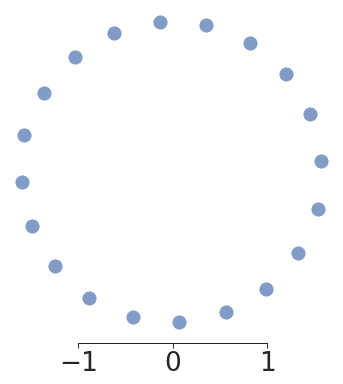

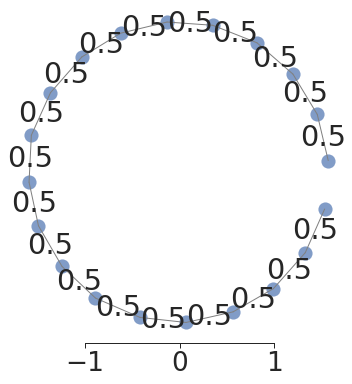

In [15]:
loss_config = {"custom": {"sampling": False,
                          "weight": -1,
                          "dim": 1,
                          "i": 1,
                          "j": 1}}
Y, result_df = compute_embedding(data=data,
                                 method_name=method_name,
                                 method_config={},
                                 loss_config=loss_config,
                                 training_config=training_config,
                                 topo_weight=topo_weight,
                                 random_state=random_state)
p = plot_embedding(Y)
plt.savefig(os.path.join(output_path, "random_D1_d1_maximize.png"), bbox_inches='tight', dpi=200)
G = plot_MST_distances(Y)

Initial loss total_loss: 0.0496, emb_loss: 0.0000, topo_loss: 0.0496, weighted_total_loss: 0.0496, 
Error: the specified d-dimensional features does not exist in the persistence diagram.
Embedding time  0h  0m 0.0431s

total_loss             0.000187
emb_loss               0.000000
topo_loss              0.000187
weighted_total_loss    0.000187
epoch                  5.000000
Name: 5, dtype: float64


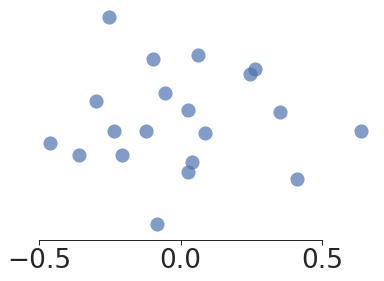

In [16]:
loss_config = {"custom": {"sampling": False,
                          "weight": 1,
                          "dim": 1,
                          "i": 1,
                          "j": 1}}
Y, result_df = compute_embedding(data=data,
                                 method_name=method_name,
                                 method_config={},
                                 loss_config=loss_config,
                                 training_config=training_config,
                                 topo_weight=topo_weight,
                                 random_state=random_state)
p = plot_embedding(Y, colors=labels)
plt.savefig(os.path.join(output_path, "random_D1_d1_minimize.png"), bbox_inches='tight', dpi=200)

Initial loss total_loss: -0.0262, emb_loss: 0.0000, topo_loss: -0.0262, weighted_total_loss: -0.0262, 
Epoch   50: total_loss: -0.1634, emb_loss: 0.0000, topo_loss: -0.1634, weighted_total_loss: -0.1634, 
Epoch  100: total_loss: -0.2627, emb_loss: 0.0000, topo_loss: -0.2627, weighted_total_loss: -0.2627, 
Epoch  150: total_loss: -0.3969, emb_loss: 0.0000, topo_loss: -0.3969, weighted_total_loss: -0.3969, 
Epoch  200: total_loss: -0.4310, emb_loss: 0.0000, topo_loss: -0.4310, weighted_total_loss: -0.4310, 
Epoch  250: total_loss: -0.5797, emb_loss: 0.0000, topo_loss: -0.5797, weighted_total_loss: -0.5797, 
Epoch  300: total_loss: -0.6133, emb_loss: 0.0000, topo_loss: -0.6133, weighted_total_loss: -0.6133, 
Epoch  350: total_loss: -0.7831, emb_loss: 0.0000, topo_loss: -0.7831, weighted_total_loss: -0.7831, 
Epoch  400: total_loss: -0.8270, emb_loss: 0.0000, topo_loss: -0.8270, weighted_total_loss: -0.8270, 
Epoch  450: total_loss: -0.9174, emb_loss: 0.0000, topo_loss: -0.9174, weighted_t

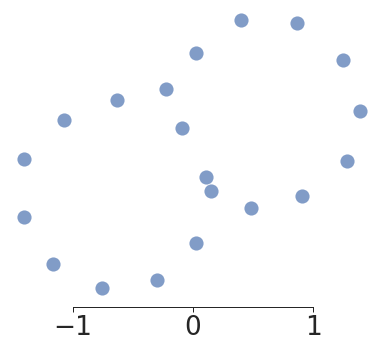

In [17]:
loss_config = {"custom": {"sampling": False,
                          "weight": -1,
                          "dim": 1,
                          "i": 2,
                          "j": 2}}
Y, result_df = compute_embedding(data=data,
                                 method_name=method_name,
                                 method_config={},
                                 loss_config=loss_config,
                                 training_config=training_config,
                                 topo_weight=topo_weight,
                                 random_state=random_state)
p = plot_embedding(Y, colors=labels)
plt.savefig(os.path.join(output_path, "random_D1_d2_maximize.png"), bbox_inches='tight', dpi=200)

Initial loss total_loss: 0.0262, emb_loss: 0.0000, topo_loss: 0.0262, weighted_total_loss: 0.0262, 
Error: the specified d-dimensional features does not exist in the persistence diagram.
Embedding time  0h  0m 0.0125s

total_loss             0.02617
emb_loss               0.00000
topo_loss              0.02617
weighted_total_loss    0.02617
epoch                  1.00000
Name: 1, dtype: float64


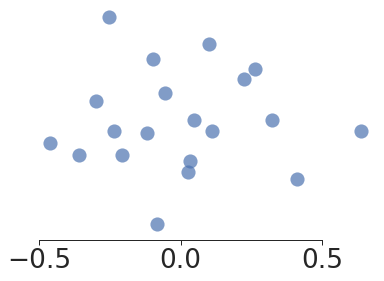

In [18]:
loss_config = {"custom": {"sampling": False,
                          "weight": 1,
                          "dim": 1,
                          "i": 2,
                          "j": 2}}
Y, result_df = compute_embedding(data=data,
                                 method_name=method_name,
                                 method_config={},
                                 loss_config=loss_config,
                                 training_config=training_config,
                                 topo_weight=topo_weight,
                                 random_state=random_state)
p = plot_embedding(Y, colors=labels)
plt.savefig(os.path.join(output_path, "random_D1_d2_minimize.png"), bbox_inches='tight', dpi=200)

Initial loss total_loss: -0.0758, emb_loss: 0.0000, topo_loss: -0.0758, weighted_total_loss: -0.0758, 
Epoch   50: total_loss: -0.7466, emb_loss: 0.0000, topo_loss: -0.7466, weighted_total_loss: -0.7466, 
Epoch  100: total_loss: -1.0748, emb_loss: 0.0000, topo_loss: -1.0748, weighted_total_loss: -1.0748, 
Epoch  150: total_loss: -1.3442, emb_loss: 0.0000, topo_loss: -1.3442, weighted_total_loss: -1.3442, 
Epoch  200: total_loss: -1.6324, emb_loss: 0.0000, topo_loss: -1.6324, weighted_total_loss: -1.6324, 
Epoch  250: total_loss: -1.9039, emb_loss: 0.0000, topo_loss: -1.9039, weighted_total_loss: -1.9039, 
Epoch  300: total_loss: -2.1765, emb_loss: 0.0000, topo_loss: -2.1765, weighted_total_loss: -2.1765, 
Epoch  350: total_loss: -2.5898, emb_loss: 0.0000, topo_loss: -2.5898, weighted_total_loss: -2.5898, 
Epoch  400: total_loss: -2.8474, emb_loss: 0.0000, topo_loss: -2.8474, weighted_total_loss: -2.8474, 
Epoch  450: total_loss: -3.1416, emb_loss: 0.0000, topo_loss: -3.1416, weighted_t

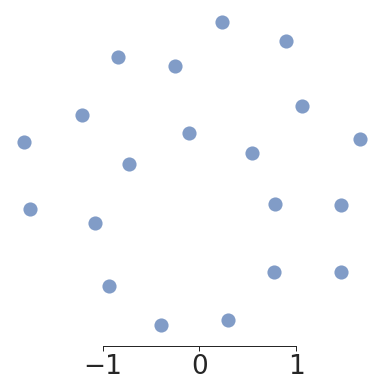

In [19]:
loss_config = {"custom": {"sampling": False,
                          "weight": -1,
                          "dim": 1,
                          "i": 1,
                          "j": np.inf}}
Y, result_df = compute_embedding(data=data,
                                 method_name=method_name,
                                 method_config={},
                                 loss_config=loss_config,
                                 training_config=training_config,
                                 topo_weight=topo_weight,
                                 random_state=random_state)
p = plot_embedding(Y)
plt.savefig(os.path.join(output_path, "random_D1_d1-dinf_maximize.png"), bbox_inches='tight', dpi=200)

Initial loss total_loss: 0.0758, emb_loss: 0.0000, topo_loss: 0.0758, weighted_total_loss: 0.0758, 
Error: the specified d-dimensional features does not exist in the persistence diagram.
Embedding time  0h  0m 0.0340s

total_loss             0.00239
emb_loss               0.00000
topo_loss              0.00239
weighted_total_loss    0.00239
epoch                  6.00000
Name: 6, dtype: float64


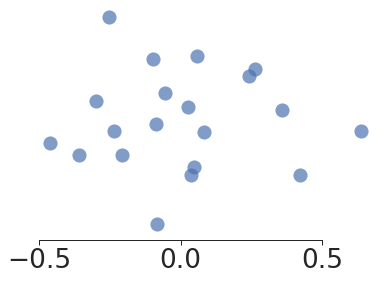

In [20]:
loss_config = {"custom": {"sampling": False,
                          "weight": 1,
                          "dim": 1,
                          "i": 1,
                          "j": np.inf}}
Y, result_df = compute_embedding(data=data,
                                 method_name=method_name,
                                 method_config={},
                                 loss_config=loss_config,
                                 training_config=training_config,
                                 topo_weight=topo_weight,
                                 random_state=random_state)
p = plot_embedding(Y, colors=labels)
plt.savefig(os.path.join(output_path, "random_D1_d1-dinf_minimize.png"), bbox_inches='tight', dpi=200)

## Sampling loss

In [21]:
# Configuration
dataset_name = "random"
dataset_config = {"n": 200, 
                  "ndim": 2,
                  "variance": 0.0675,
                  "seed": 420,
                  "noise": "normal"}

# Data
dataset_generator = datasets.str_to_data(dataset_name)
data_large, labels_large = dataset_generator(**dataset_config)

In [22]:
loss_config = {"custom": {"sampling": False,
                          "weight": -1,
                          "dim": 1,
                          "i": 1,
                          "j": 1}}
training_config_special = {
    "num_epochs": 500,
    "learning_rate": 0.01,
}
Y, result_df = compute_embedding(data=data_large,
                                 method_name=method_name,
                                 method_config={},
                                 loss_config=loss_config,
                                 training_config=training_config_special,
                                 topo_weight=topo_weight,
                                 random_state=random_state)


Initial loss total_loss: -0.0780, emb_loss: 0.0000, topo_loss: -0.0780, weighted_total_loss: -0.0780, 
Epoch   50: total_loss: -0.4122, emb_loss: 0.0000, topo_loss: -0.4122, weighted_total_loss: -0.4122, 
Epoch  100: total_loss: -0.5743, emb_loss: 0.0000, topo_loss: -0.5743, weighted_total_loss: -0.5743, 
Epoch  150: total_loss: -0.7875, emb_loss: 0.0000, topo_loss: -0.7875, weighted_total_loss: -0.7875, 
Epoch  200: total_loss: -0.9197, emb_loss: 0.0000, topo_loss: -0.9197, weighted_total_loss: -0.9197, 
Epoch  250: total_loss: -1.0800, emb_loss: 0.0000, topo_loss: -1.0800, weighted_total_loss: -1.0800, 
Epoch  300: total_loss: -1.1582, emb_loss: 0.0000, topo_loss: -1.1582, weighted_total_loss: -1.1582, 
Epoch  350: total_loss: -1.1802, emb_loss: 0.0000, topo_loss: -1.1802, weighted_total_loss: -1.1802, 
Epoch  400: total_loss: -1.4554, emb_loss: 0.0000, topo_loss: -1.4554, weighted_total_loss: -1.4554, 
Epoch  450: total_loss: -1.6184, emb_loss: 0.0000, topo_loss: -1.6184, weighted_t

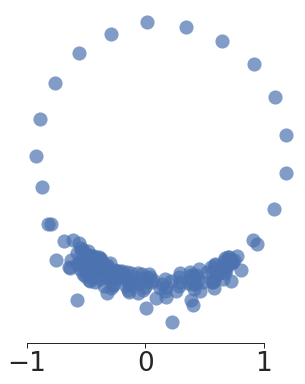

In [23]:
p = plot_embedding(Y)
plt.savefig(os.path.join(output_path, "random_D1_d1_gaussian_noSampling.png"), bbox_inches='tight', dpi=200)

Initial loss total_loss: -0.1085, emb_loss: 0.0000, topo_loss: -0.1085, weighted_total_loss: -0.1085, 
Epoch   50: total_loss: -0.1024, emb_loss: 0.0000, topo_loss: -0.1024, weighted_total_loss: -0.1024, 
Epoch  100: total_loss: -0.0815, emb_loss: 0.0000, topo_loss: -0.0815, weighted_total_loss: -0.0815, 
Epoch  150: total_loss: -0.2193, emb_loss: 0.0000, topo_loss: -0.2193, weighted_total_loss: -0.2193, 
Epoch  200: total_loss: -0.0524, emb_loss: 0.0000, topo_loss: -0.0524, weighted_total_loss: -0.0524, 
Epoch  250: total_loss: -0.3330, emb_loss: 0.0000, topo_loss: -0.3330, weighted_total_loss: -0.3330, 
Epoch  300: total_loss: -0.3440, emb_loss: 0.0000, topo_loss: -0.3440, weighted_total_loss: -0.3440, 
Epoch  350: total_loss: -0.6403, emb_loss: 0.0000, topo_loss: -0.6403, weighted_total_loss: -0.6403, 
Epoch  400: total_loss: -0.6237, emb_loss: 0.0000, topo_loss: -0.6237, weighted_total_loss: -0.6237, 
Epoch  450: total_loss: -0.7664, emb_loss: 0.0000, topo_loss: -0.7664, weighted_t

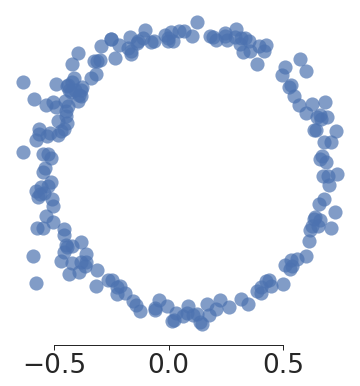

In [24]:
loss_config = {"custom": {"sampling": True,
                          "sampling_frac": 0.2,
                          "sampling_rep": 1,
                          "weight": -1,
                          "dim": 1,
                          "i": 1,
                          "j": 1}}
Y, result_df = compute_embedding(data=data_large,
                                 method_name=method_name,
                                 method_config={},
                                 loss_config=loss_config,
                                 training_config=training_config_special,
                                 topo_weight=topo_weight,
                                 random_state=random_state)
p = plot_embedding(Y, colors=labels)
plt.savefig(os.path.join(output_path, "random_D1_d1_gaussian_sampling.png"), bbox_inches='tight', dpi=200)

In [25]:
loss_config = {"custom": {"sampling": False,
                          "weight": -1,
                          "dim": 1,
                          "i": 1,
                          "j": 1}}
training_config_special = {
    "num_epochs": 2000,
    "learning_rate": 0.01,
}
Y, result_df = compute_embedding(data=data_large,
                                 method_name=method_name,
                                 method_config={},
                                 loss_config=loss_config,
                                 training_config=training_config_special,
                                 topo_weight=topo_weight,
                                 random_state=random_state)

Initial loss total_loss: -0.0780, emb_loss: 0.0000, topo_loss: -0.0780, weighted_total_loss: -0.0780, 
Epoch  200: total_loss: -0.9197, emb_loss: 0.0000, topo_loss: -0.9197, weighted_total_loss: -0.9197, 
Epoch  400: total_loss: -1.4554, emb_loss: 0.0000, topo_loss: -1.4554, weighted_total_loss: -1.4554, 
Epoch  600: total_loss: -2.0062, emb_loss: 0.0000, topo_loss: -2.0062, weighted_total_loss: -2.0062, 
Epoch  800: total_loss: -2.4337, emb_loss: 0.0000, topo_loss: -2.4337, weighted_total_loss: -2.4337, 
Epoch 1000: total_loss: -3.1037, emb_loss: 0.0000, topo_loss: -3.1037, weighted_total_loss: -3.1037, 
Epoch 1200: total_loss: -3.6385, emb_loss: 0.0000, topo_loss: -3.6385, weighted_total_loss: -3.6385, 
Epoch 1400: total_loss: -4.1617, emb_loss: 0.0000, topo_loss: -4.1617, weighted_total_loss: -4.1617, 
Epoch 1600: total_loss: -4.6363, emb_loss: 0.0000, topo_loss: -4.6363, weighted_total_loss: -4.6363, 
Epoch 1800: total_loss: -5.1685, emb_loss: 0.0000, topo_loss: -5.1685, weighted_t

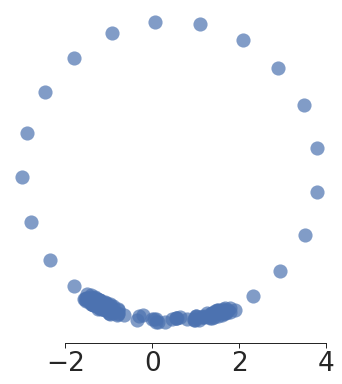

In [26]:
p = plot_embedding(Y)
plt.savefig(os.path.join(output_path, "random_D1_d1_gaussian_2000epochs.png"), bbox_inches='tight', dpi=200)